In [1]:
from datetime import datetime
import math
import random

import matplotlib.pyplot as plt

%matplotlib notebook

EPS = 1e-6

In [2]:
def cumulative_plot(tasks):
    min_workload = []
    max_workload = []
    
    avail_tasks = sorted(tasks, key=lambda x: x[0])
    due_tasks = sorted(tasks, key=lambda x: x[1])
    N = len(tasks)  # number of tasks
    T = due_tasks[-1][1]  # latest due date
    S = sum([x[2] for x in tasks])  # sum of workload
    
    curr_sum = 0
    curr_index = 0
    for i in range(T + 1):
        while curr_index < N and due_tasks[curr_index][1] == i:
            curr_sum += due_tasks[curr_index][2]
            curr_index += 1
        min_workload.append(curr_sum)
        
    curr_sum = 0
    curr_index = 0
    for i in range(T + 1):
        while curr_index < N and avail_tasks[curr_index][0] == i:
            curr_sum += avail_tasks[curr_index][2]
            curr_index += 1
        max_workload.append(curr_sum)
        
    def get_slope(sps, x):
        ind = max([0] + [i for i in range(len(sps) - 1) if sps[i][0] < x])
        return (sps[ind + 1][1] - sps[ind][1]) / (sps[ind + 1][0] - sps[ind][0])
        
    num_setpoints = 0
    setpoints = [(0, 0), (T, S)]
    while num_setpoints != len(setpoints):
        x, y, num_setpoints = 0, 0, len(setpoints)
        while x < T:
            x += 1
            y += get_slope(setpoints, x)
            
            if y < min_workload[x] - EPS:
                setpoints.append((x, min_workload[x]))
                x = T
            elif y - EPS > max_workload[x] + EPS:
                setpoint_x = max([i for i in range(T) if max_workload[i] == max_workload[x]])
                setpoints.append((setpoint_x, max_workload[x]))
                x = T
            
        setpoints = sorted(setpoints, key=lambda x: x[0])
        
            
    target_workload = [0]
    for i in range(1, T + 1):
        target_workload.append(target_workload[i - 1] + get_slope(setpoints, i))
        
    return min_workload, max_workload, target_workload

In [3]:
def get_min_max_workload(tasks):
    min_workload = []
    max_workload = []
    
    avail_tasks = sorted(tasks, key=lambda x: x[0])
    due_tasks = sorted(tasks, key=lambda x: x[1])
    N = len(tasks)  # number of tasks
    T = due_tasks[-1][1]  # latest due date
    S = sum([x[2] for x in tasks])  # sum of workload
    
    curr_sum = 0
    curr_index = 0
    for i in range(T + 1):
        while curr_index < N and due_tasks[curr_index][1] == i:
            curr_sum += due_tasks[curr_index][2]
            curr_index += 1
        min_workload.append(curr_sum)
        
    curr_sum = 0
    curr_index = 0
    for i in range(T + 1):
        while curr_index < N and avail_tasks[curr_index][0] == i:
            curr_sum += avail_tasks[curr_index][2]
            curr_index += 1
        max_workload.append(curr_sum)
        
    return min_workload, max_workload

In [4]:
class Setpoints:
    def __init__(self, T):
        self.setpoints_dict = {0: 0, T: 0}
        
    def to_list(self):
        return sorted(self.setpoints_dict.items(), key=lambda x: x[0])
    
    def add_task(self, due, workload, curr):
        if due not in self.setpoints_dict:
            self.setpoints_dict[due] = curr
            
        for key in self.setpoints_dict:
            if key >= due:
                self.setpoints_dict[key] += workload
    
    def get_slope(self, x, y):
        sps = self.to_list()
        upcoming_sps = [s for s in sps if s[0] > x]
        if len(upcoming_sps) == 0:
            return 0
        
        return max([(s[1] - y) / (s[0] - x) for s in upcoming_sps])

def cumulative_plot_v2(tasks):
    avail_tasks = sorted(tasks, key=lambda x: x[0])
    due_tasks = sorted(tasks, key=lambda x: x[1])
    N = len(tasks)  # number of tasks
    T = due_tasks[-1][1]  # latest due date
    S = sum([x[2] for x in tasks])  # sum of workload
    
    curr_work = [0]
    curr_avail_tasks = []
    setpoints = Setpoints(T)
    for i in range(T + 1):
        new_avail_tasks = [t for t in tasks if t[0] == i]
        for t in new_avail_tasks:
            setpoints.add_task(t[1], t[2], curr_work[-1])
        slope = setpoints.get_slope(i, curr_work[-1])
        curr_work.append(curr_work[-1] + slope)
    
    curr_work = curr_work[:-1]
    
    return curr_work

In [5]:
tasks = [
    (0, 10, 20),
    (15, 20, 20),
    (10, 30, 40),
]

[0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 34.0, 38.0, 42.0, 46.0, 50.0, 53.0, 56.0, 59.0, 62.0, 65.0, 68.0, 71.0, 74.0, 77.0, 80.0]
[-80.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


<IPython.core.display.Javascript object>


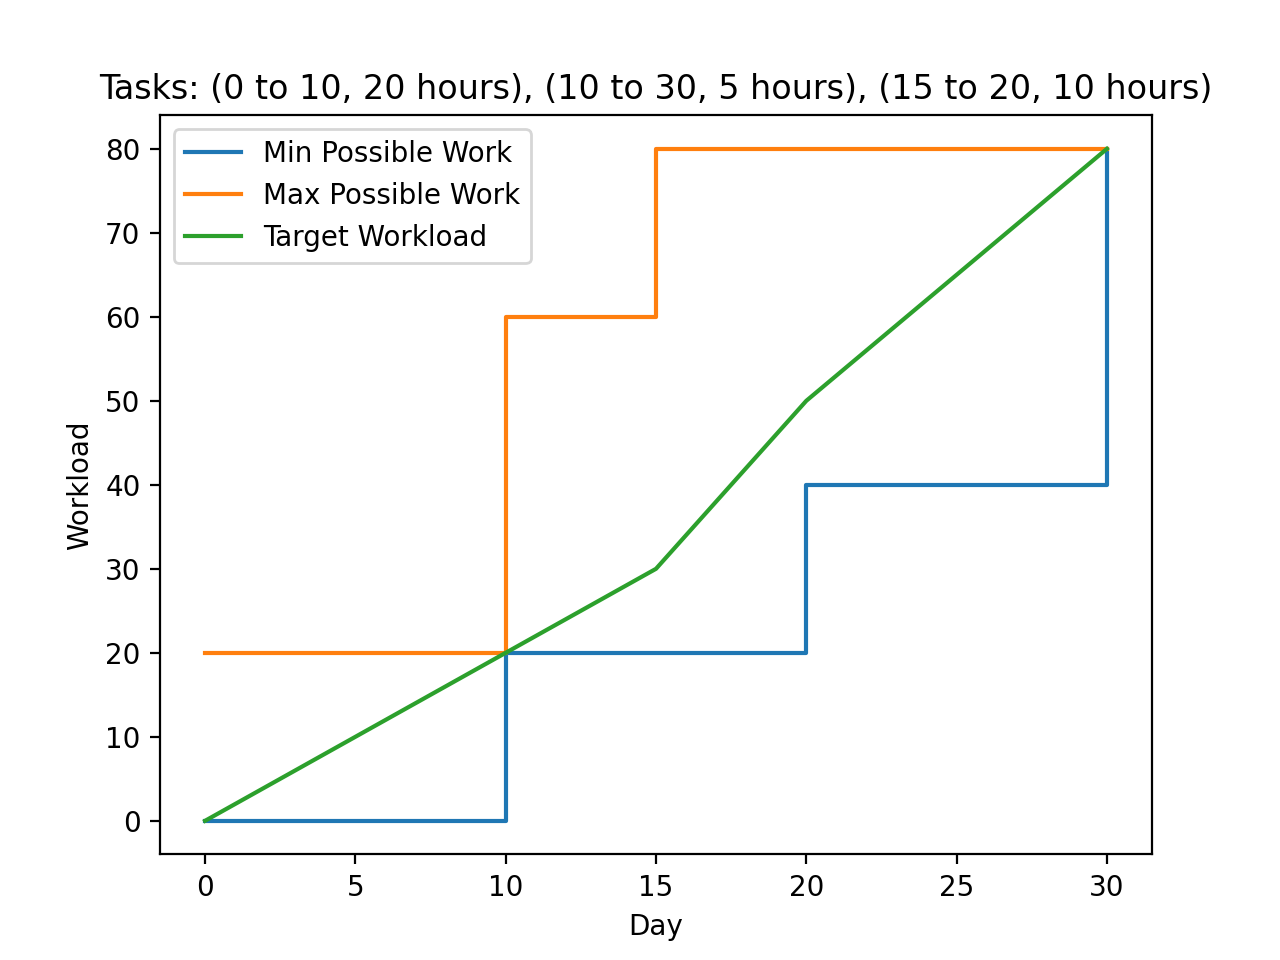

In [6]:
min_workload, max_workload = get_min_max_workload(tasks)
target_workload = cumulative_plot_v2(tasks)

print(target_workload)
print([target_workload[i] - target_workload[i - 1] for i in range(len(target_workload))])

fig, ax = plt.subplots()
T = len(min_workload) - 1
ax.plot(range(T + 1), min_workload, label="Min Possible Work", ds="steps-post")
ax.plot(range(T + 1), max_workload, label="Max Possible Work", ds="steps-post")
ax.plot(range(T + 1), target_workload, label="Target Workload")
ax.legend()
ax.set_xlabel("Day")
ax.set_ylabel("Workload")
ax.set_title("Tasks: (0 to 10, 20 hours), (10 to 30, 5 hours), (15 to 20, 10 hours)")
fig.show()